In [2]:
import pandas as pd
import os

In [3]:
POKE_PATH = os.path.join("datasets", "pokemon")

In [4]:
def load_poke_data(poke_path=POKE_PATH):
    csv_path = os.path.join(poke_path, "pokemon.csv")
    return pd.read_csv(csv_path)

In [5]:
pokemon = load_poke_data()

In [6]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [8]:
pokemon["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Rock        14
Ice         14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [9]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [10]:
import matplotlib.pyplot as plt

In [11]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [17]:
pokemon_status = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c474748>,
      dtype=object)

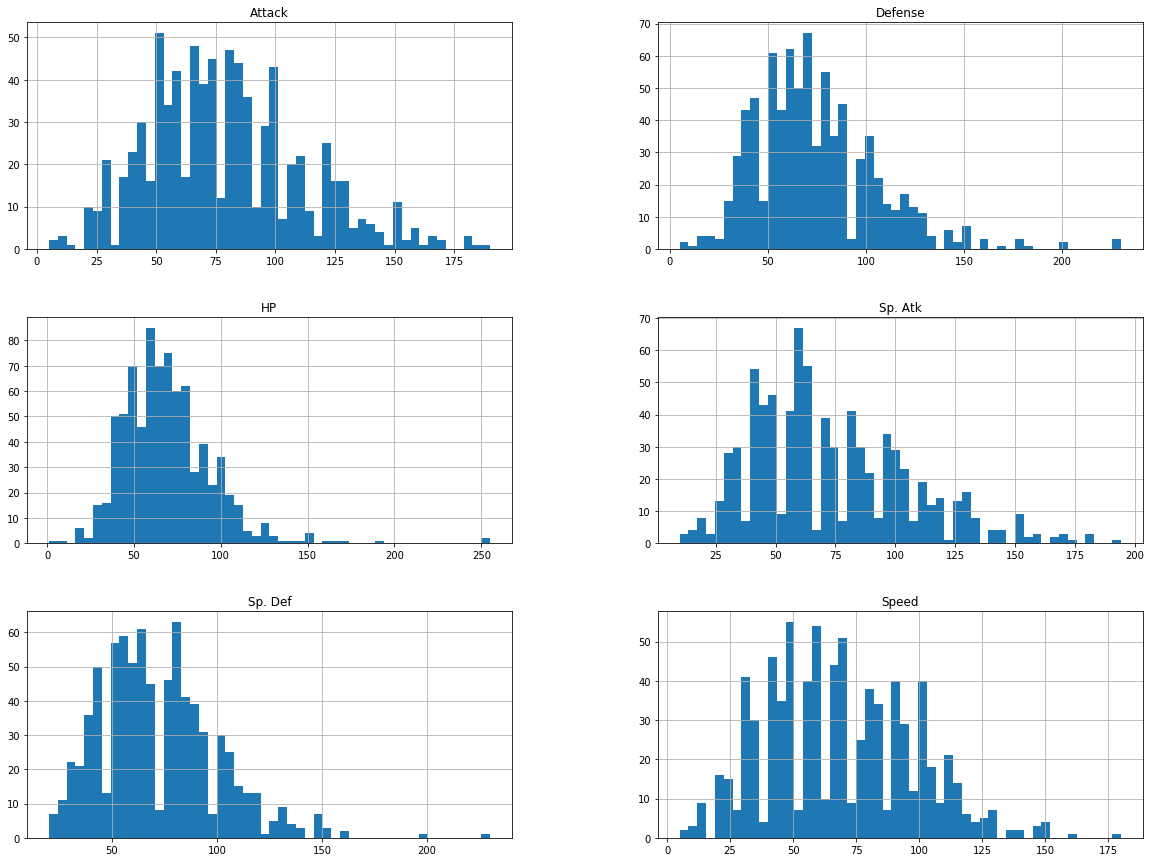

In [20]:
pokemon[pokemon_status].hist(bins=50, figsize=(20,15))

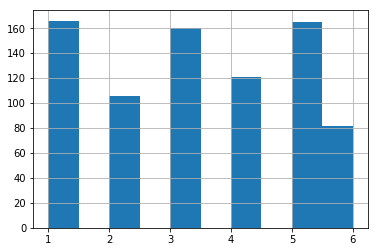

In [41]:
pokemon["Generation"].hist()

In [42]:
corr_matrix = pokemon.corr()

In [43]:
corr_matrix["Speed"].sort_values(ascending=False)

Speed         1.000000
Total         0.575943
Sp. Atk       0.473018
Attack        0.381240
Legendary     0.326715
Sp. Def       0.259133
HP            0.175952
Defense       0.015227
#             0.010733
Generation   -0.023121
Name: Speed, dtype: float64

In [44]:
corr_matrix["Attack"].sort_values(ascending=False)

Attack        1.000000
Total         0.736211
Defense       0.438687
HP            0.422386
Sp. Atk       0.396362
Speed         0.381240
Legendary     0.345408
Sp. Def       0.263990
#             0.102298
Generation    0.051451
Name: Attack, dtype: float64

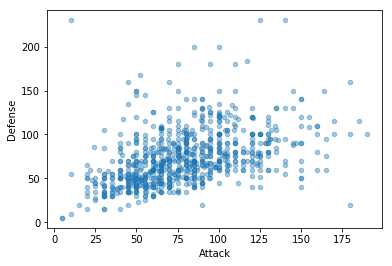

In [47]:
pokemon.plot(kind="scatter", x="Attack", y="Defense", alpha=0.4)

In [48]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125370c18>,
      dtype=object)

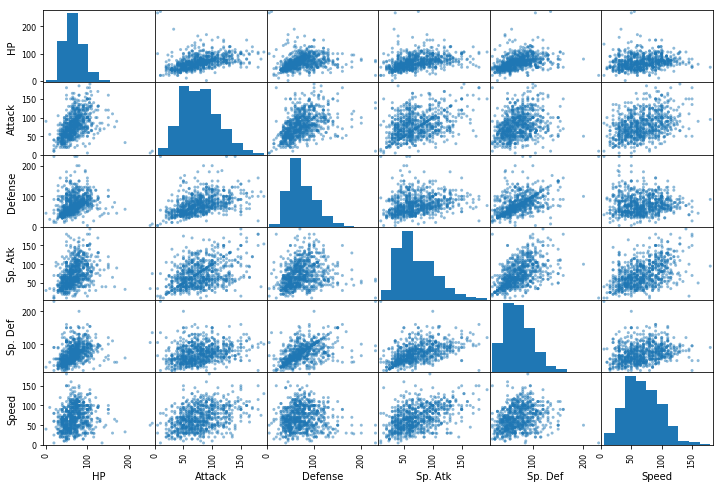

In [49]:
scatter_matrix(pokemon[pokemon_status], figsize=(12,8))

### Let's look into the relationship between type and stauts.

In [52]:
pokemon["Attack_per"] = pokemon["Attack"]/pokemon["Total"] * 100

In [53]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Attack_per
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,18.018870
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,5.075865
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,1.111111
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,14.607792
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,17.857143
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,21.458818
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,38.135593


In [54]:
pokemon["Attack_per"]

0      15.408805
1      15.308642
2      15.619048
3      16.000000
4      16.828479
5      15.802469
6      15.730337
7      20.504732
8      16.403785
9      15.286624
10     15.555556
11     15.660377
12     16.349206
13     15.384615
14      9.756098
15     11.392405
16     17.948718
17     12.195122
18     22.784810
19     30.303030
20     17.928287
21     17.191977
22     16.701461
23     13.816926
24     22.134387
25     19.612591
26     22.900763
27     20.361991
28     20.833333
29     19.406393
         ...    
770    12.380952
771    18.400000
772    13.457077
773    10.000000
774    16.666667
775    16.592920
776    16.666667
777    17.021277
778    22.653722
779    23.206751
780    19.701493
781    19.701493
782    19.701493
783    19.701493
784    18.218623
785    17.206478
786    19.230769
787    20.242915
788    22.697368
789    22.762646
790    12.244898
791    13.084112
792    19.264706
793    19.264706
794    16.666667
795    16.666667
796    22.857143
797    18.3333

In [55]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Attack_per
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,15.408805
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,15.308642
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,15.619048
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,16.000000
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,16.828479


In [93]:
from pandas import DataFrame

In [103]:
import numpy as np

In [133]:
Grass_type = DataFrame({'Name': pokemon["Name"], 'Type':pokemon["Type 1"], 'Attack':pokemon["Attack"]}, index=np.arange(800))

In [134]:
Grass_type

,Name,Type,Attack
0,Bulbasaur,Grass,49
1,Ivysaur,Grass,62
2,Venusaur,Grass,82
3,VenusaurMega Venusaur,Grass,100
4,Charmander,Fire,52
5,Charmeleon,Fire,64
6,Charizard,Fire,84
7,CharizardMega Charizard X,Fire,130
8,CharizardMega Charizard Y,Fire,104
9,Squirtle,Water,48


In [135]:
Grass_type["Type"].where(Grass_type["Type"] == "Grass", inplace=True)

In [136]:
Grass_type

,Name,Type,Attack
0,Bulbasaur,Grass,49
1,Ivysaur,Grass,62
2,Venusaur,Grass,82
3,VenusaurMega Venusaur,Grass,100
4,Charmander,NaN,52
5,Charmeleon,NaN,64
6,Charizard,NaN,84
7,CharizardMega Charizard X,NaN,130
8,CharizardMega Charizard Y,NaN,104
9,Squirtle,NaN,48


In [137]:
Grass_type = Grass_type.dropna()

In [138]:
Grass_type

,Name,Type,Attack
0,Bulbasaur,Grass,49
1,Ivysaur,Grass,62
2,Venusaur,Grass,82
3,VenusaurMega Venusaur,Grass,100
48,Oddish,Grass,50
49,Gloom,Grass,65
50,Vileplume,Grass,80
75,Bellsprout,Grass,75
76,Weepinbell,Grass,90
77,Victreebel,Grass,105


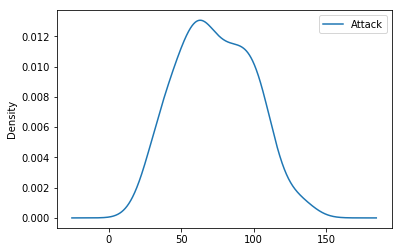

In [139]:
Grass_type.plot.kde()

In [143]:
Fire_type = DataFrame({'Name': pokemon["Name"], 'Type':pokemon["Type 1"], 'Attack':pokemon["Attack"]}, index=np.arange(800))
Fire_type.where(Fire_type["Type"] == "Fire", inplace=True)
Fire_type = Fire_type.dropna()

In [144]:
Fire_type

,Name,Type,Attack
4,Charmander,Fire,52.0
5,Charmeleon,Fire,64.0
6,Charizard,Fire,84.0
7,CharizardMega Charizard X,Fire,130.0
8,CharizardMega Charizard Y,Fire,104.0
42,Vulpix,Fire,41.0
43,Ninetales,Fire,76.0
63,Growlithe,Fire,70.0
64,Arcanine,Fire,110.0
83,Ponyta,Fire,85.0


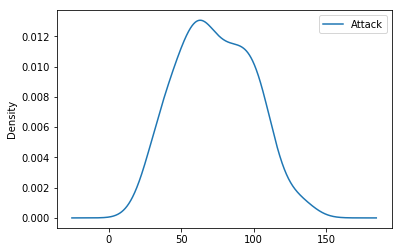

In [145]:
Grass_type.plot.kde()

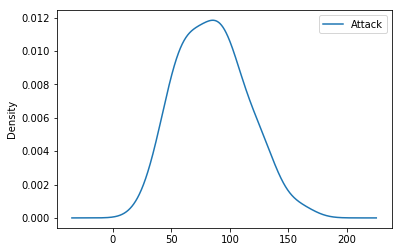

In [146]:
Fire_type.plot.kde()

In [147]:
comp = DataFrame({"Grass":Grass_type["Attack"], "Fire":Fire_type["Attack"]})

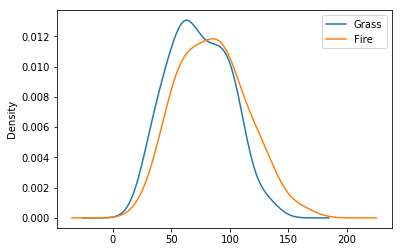

In [148]:
comp.plot.kde()

In [149]:
comp.describe()

,Grass,Fire
count,70.000000,52.000000
mean,73.214286,84.769231
std,25.380520,28.769275
min,27.000000,30.000000
25%,55.000000,62.250000
50%,70.000000,84.500000
75%,93.500000,101.000000
max,132.000000,160.000000
